In [28]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from keras.models import Sequential
from keras.layers import Dense


In [2]:
# Load the ratings.dat file
truenews_df = pd.read_csv(
    r"C:\Users\alfem\Desktop\MLProject Datasets\True.csv"
)

# Load the movies.dat file
fakenews_df = pd.read_csv(r"C:\Users\alfem\Desktop\MLProject Datasets\Fake.csv")

In [3]:
truenews_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fakenews_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Data Exploration and preprocessing

In [5]:
truenews_df.describe()


,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [6]:
fakenews_df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [7]:
print(truenews_df.isnull().sum())
print(fakenews_df.isnull().sum())

title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [8]:
# Remove duplicate titles
truenews_df = truenews_df.drop_duplicates(subset='title')
fakenews_df = fakenews_df.drop_duplicates(subset='title')

# Alternatively, remove duplicate text if you think that's more appropriate
truenews_df = truenews_df.drop_duplicates(subset='text')
fakenews_df = fakenews_df.drop_duplicates(subset='text')

In [9]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess_texts(texts):
    texts = re.sub(r'[^a-zA-Z\s]', '', texts)
    processed_texts = word_tokenize(texts)
    processed_texts = [word.lower() for word in processed_texts]
    processed_texts = [word for word in processed_texts if word not in stop_words]
    processed_texts = [stemmer.stem(word) for word in processed_texts]
    return processed_texts

truenews_df['text'].apply(preprocess_texts)

0        [washington, reuter, head, conserv, republican...
1        [washington, reuter, transgend, peopl, allow, ...
2        [washington, reuter, special, counsel, investi...
3        [washington, reuter, trump, campaign, advis, g...
4        [seattlewashington, reuter, presid, donald, tr...
                               ...                        
21411    [unit, nation, reuter, two, north, korean, shi...
21413    [london, reuter, lexisnexi, provid, legal, reg...
21414    [minsk, reuter, shadow, disus, sovietera, fact...
21415    [moscow, reuter, vatican, secretari, state, ca...
21416    [jakarta, reuter, indonesia, buy, sukhoi, figh...
Name: text, Length: 20821, dtype: object

In [10]:
fakenews_df['text'].apply(preprocess_texts)

0        [donald, trump, wish, american, happi, new, ye...
1        [hous, intellig, committe, chairman, devin, nu...
2        [friday, reveal, former, milwauke, sheriff, da...
3        [christma, day, donald, trump, announc, would,...
4        [pope, franci, use, annual, christma, day, mes...
                               ...                        
22698    [st, centuri, wire, say, world, stage, men, wo...
22699    [randi, johnson, st, centuri, wireth, major, m...
22700    [tune, altern, current, radio, network, acr, a...
22701    [st, centuri, wire, say, new, front, open, lon...
22702    [st, centuri, wire, say, far, away, guess, wan...
Name: text, Length: 17450, dtype: object

Bag of Words

In [11]:
vectorizer = CountVectorizer()

X_true = vectorizer.fit_transform(truenews_df['text'])
X_fake = vectorizer.fit_transform(fakenews_df['text'])

TF-IDF

In [12]:
tfidf_vectorizer = TfidfVectorizer()
combined_texts = np.concatenate([truenews_df['text'], fakenews_df['text']])
X_combined = tfidf_vectorizer.fit_transform(combined_texts)


In [13]:
y_true = np.ones(truenews_df.shape[0])
y_fake = np.zeros(fakenews_df.shape[0])

In [14]:
y = np.hstack((y_true, y_fake))

Train-Test Data split

In [16]:


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(30616, 121972) (7655, 121972) (30616,) (7655,)


In [17]:


# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)


In [18]:
y_pred_logreg

array([1., 1., 0., ..., 1., 1., 1.])

In [19]:
accuracy = accuracy_score(y_test, y_pred_logreg)
print(accuracy)

0.9845852384062704


In [20]:
# Check the overall class distribution
print("Overall class distribution:", np.bincount(y.astype(int)))

# Check the distribution in the train and test sets
print("Train set distribution:", np.bincount(y_train.astype(int)))
print("Test set distribution:", np.bincount(y_test.astype(int)))

Overall class distribution: [17450 20821]
Train set distribution: [13953 16663]
Test set distribution: [3497 4158]


In [21]:
# Evaluate with classification report
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3497
         1.0       0.98      0.99      0.99      4158

    accuracy                           0.98      7655
   macro avg       0.98      0.98      0.98      7655
weighted avg       0.98      0.98      0.98      7655

Confusion Matrix:
 [[3429   68]
 [  50 4108]]


Understanding logistic regression


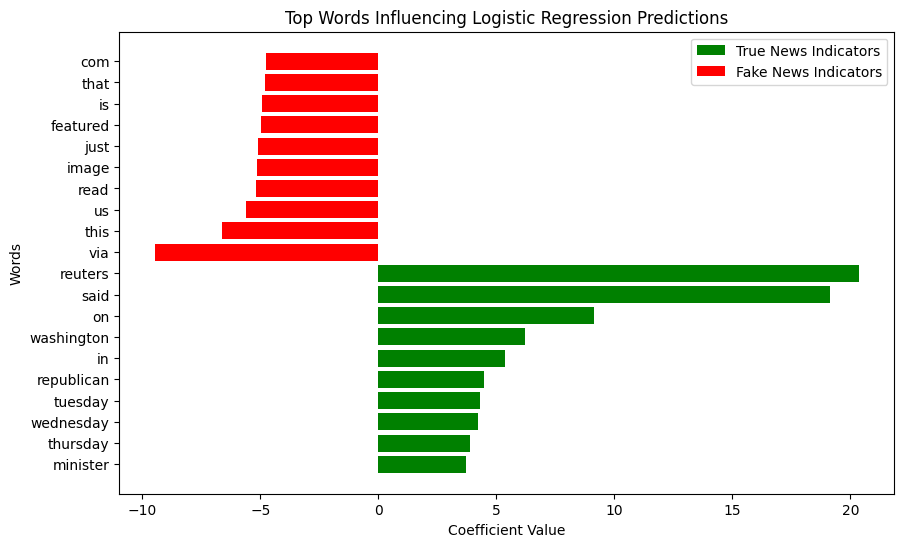

In [23]:

# Get the coefficients from the trained logistic regression model
coefficients = logreg_model.coef_.flatten()

# Get the feature names (i.e., words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sort the coefficients in ascending order
sorted_indices = np.argsort(coefficients)

# Select the top positive and top negative words influencing predictions
top_positive_indices = sorted_indices[-10:]  # Most positive coefficients (true news indicators)
top_negative_indices = sorted_indices[:10]   # Most negative coefficients (fake news indicators)

# Get the corresponding feature names and their coefficients
top_positive_words = feature_names[top_positive_indices]
top_negative_words = feature_names[top_negative_indices]

top_positive_coefficients = coefficients[top_positive_indices]
top_negative_coefficients = coefficients[top_negative_indices]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_positive_words, top_positive_coefficients, color='green', label='True News Indicators')
plt.barh(top_negative_words, top_negative_coefficients, color='red', label='Fake News Indicators')
plt.xlabel("Coefficient Value")
plt.ylabel("Words")
plt.title("Top Words Influencing Logistic Regression Predictions")
plt.legend()
plt.show()


Area Under the Curve (AUC): 0.9974091033570587


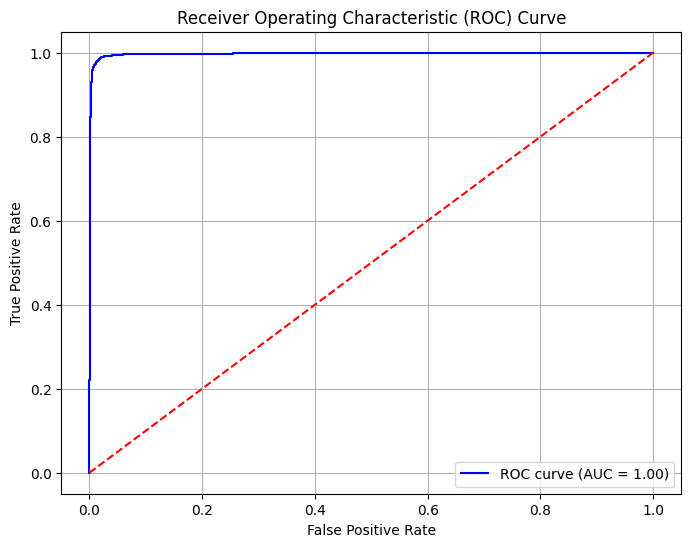

In [26]:
# Predict probabilities instead of labels
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (true news)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Area Under the Curve (AUC): {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

Naive Bayes model

In [29]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9325930764206402
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      3497
         1.0       0.91      0.97      0.94      4158

    accuracy                           0.93      7655
   macro avg       0.94      0.93      0.93      7655
weighted avg       0.93      0.93      0.93      7655



In [30]:
# Initialize the SVM model
svm_model = SVC(kernel='linear')  # You can try 'rbf' or 'poly' for non-linear

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9916394513389941
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3497
         1.0       0.99      0.99      0.99      4158

    accuracy                           0.99      7655
   macro avg       0.99      0.99      0.99      7655
weighted avg       0.99      0.99      0.99      7655



In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

In [ ]:
# Initialize the Neural Network model
nn_model = Sequential()

# Add layers (you can adjust the architecture based on your needs)
nn_model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(256, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=64, validation_split=0.1)

# Make predictions
y_pred_nn = (nn_model.predict(X_test.toarray()) > 0.5).astype("int32")

# Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))